In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Replace 'cinema_data.csv' with your actual file path
data = pd.read_excel('/content/CinemaHall_dataset.xlsx')

In [30]:
# View the first few rows of the dataset
print(data.head())

# Get the shape of the dataset (number of rows and columns)
print(data.shape)

# Get the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

        city                                    theatre_name  \
0  Ahmedabad  AB Miniplex: Shivranjini Cross Road, Satellite   
1  Ahmedabad                         Amber Cinema: Ahmedabad   
2  Ahmedabad                        Anupam Cinema: Ahmedabad   
3  Ahmedabad                         Carnival: Himalaya Mall   
4  Ahmedabad                     Cinemax: Dev Arc, Ahmedabad   

   average_ticket_price  total_seats  no_screens           type theatre_chain  \
0            125.619048          302           3      Multiplex       Unknown   
1            100.833333          763           1  Single Screen       Unknown   
2            125.833333          781           1  Single Screen       Unknown   
3            189.050926         1110           5      Multiplex      Carnival   
4            176.435185         1047           4      Multiplex           PVR   

        lat       lon  calculated_seats  calculated_ticket_prices  \
0  23.02494  72.52938               302                118.

Average Ticket Price: ₹168.78
Theater with Highest Average Ticket Price: PVR: Director's Cut, Ambience Delhi


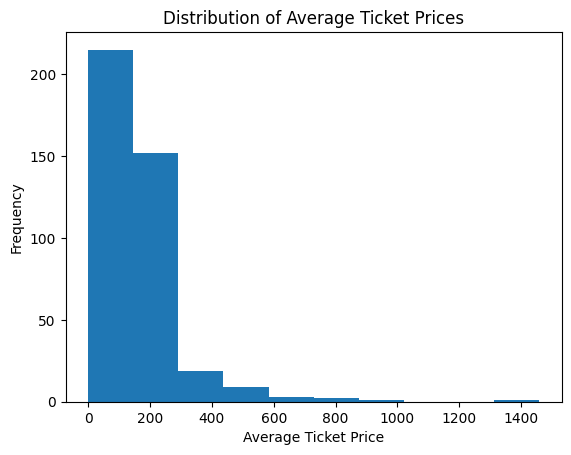

In [ ]:
# Calculate the average ticket price across all theaters
avg_ticket_price = data['average_ticket_price'].mean()
print(f'Average Ticket Price: ₹{avg_ticket_price:.2f}')

# Find the theater with the highest average ticket price
max_ticket_price_theater = data.loc[data['average_ticket_price'].idxmax()]
print(f'Theater with Highest Average Ticket Price: {max_ticket_price_theater["theatre_name"]}')

# Plot a histogram of average ticket prices
plt.hist(data['average_ticket_price'], bins=10)
plt.xlabel('Average Ticket Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ticket Prices')
plt.show()

city
Ahmedabad    149.094915
Bangalore    183.508913
Chennai       97.972407
Delhi        301.820710
Hyderabad     95.061454
Kochi        119.555098
Kolkata      187.804837
Mumbai       198.144273
Name: average_ticket_price, dtype: float64


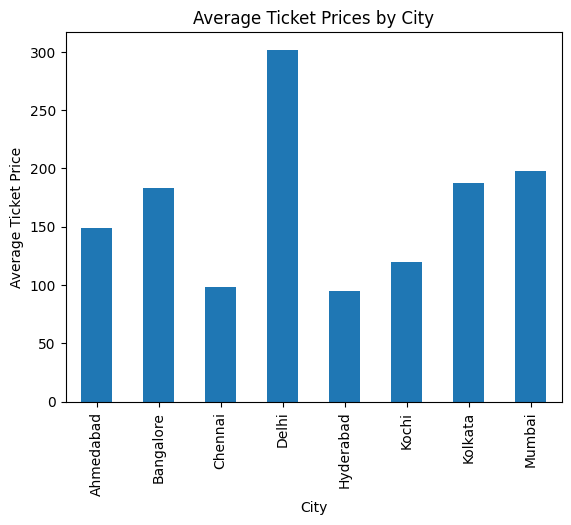

In [ ]:
# Group data by city and calculate average ticket price for each city
city_avg_ticket_price = data.groupby('city')['average_ticket_price'].mean()
print(city_avg_ticket_price)

# Plot a bar chart of average ticket prices by city
city_avg_ticket_price.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Prices by City')
plt.show()

In [ ]:
# Sort data by average ticket price in descending order and select top 5
top_5_theaters = data.nlargest(5, 'average_ticket_price')
print(top_5_theaters[['theatre_name', 'average_ticket_price']])

                            theatre_name  average_ticket_price
175  PVR: Director's Cut, Ambience Delhi           1458.333333
183  PVR: Select City Walk (Gold), Delhi            943.750000
77            PVR: Forum Gold, Bengaluru            825.000000
83          PVR: Orion Gold, Rajajinagar            806.296296
88               PVR: VR Gold, Bengaluru            697.025000


type
Single Screen    232
Multiplex        170
Name: count, dtype: int64


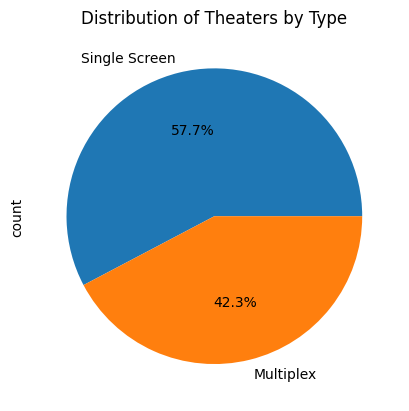

In [ ]:
# Group data by type and count the number of theaters
theater_type_counts = data['type'].value_counts()
print(theater_type_counts)

# Plot a pie chart of theater types
theater_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Theaters by Type')
plt.show()

no_screens
1     126.871910
2     237.390022
3     210.947110
4     222.563059
5     221.003817
6     246.959924
7     214.874064
8     252.940930
9     254.202717
10    286.933333
Name: average_ticket_price, dtype: float64


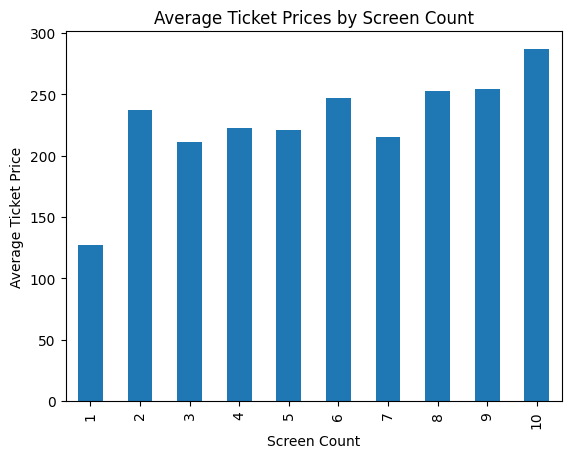

In [ ]:
# Group data by screen count and calculate average ticket price
avg_ticket_price_by_screens = data.groupby('no_screens')['average_ticket_price'].mean()
print(avg_ticket_price_by_screens)

# Plot a bar chart of average ticket prices by screen count
avg_ticket_price_by_screens.plot(kind='bar')
plt.xlabel('Screen Count')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Prices by Screen Count')
plt.show()

Correlation Coefficient: -0.14


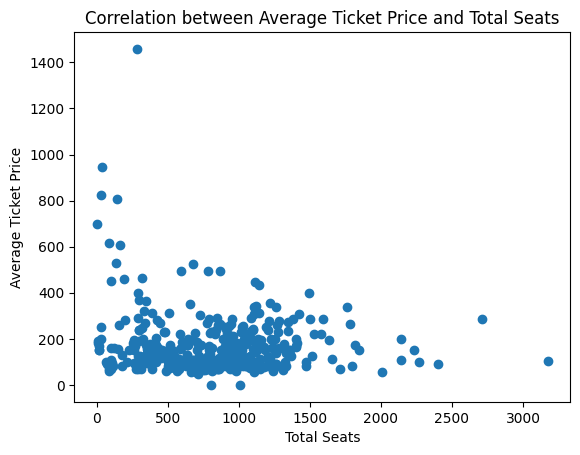

In [ ]:
# Calculate the correlation coefficient between average ticket price and total seats
correlation_coefficient = data['average_ticket_price'].corr(data['total_seats'])
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Plot a scatter plot of average ticket price vs total seats
plt.scatter(data['total_seats'], data['average_ticket_price'])
plt.xlabel('Total Seats')
plt.ylabel('Average Ticket Price')
plt.title('Correlation between Average Ticket Price and Total Seats')
plt.show()

city
Bangalore    104
Hyderabad    104
Mumbai        77
Delhi         42
Ahmedabad     27
Name: count, dtype: int64


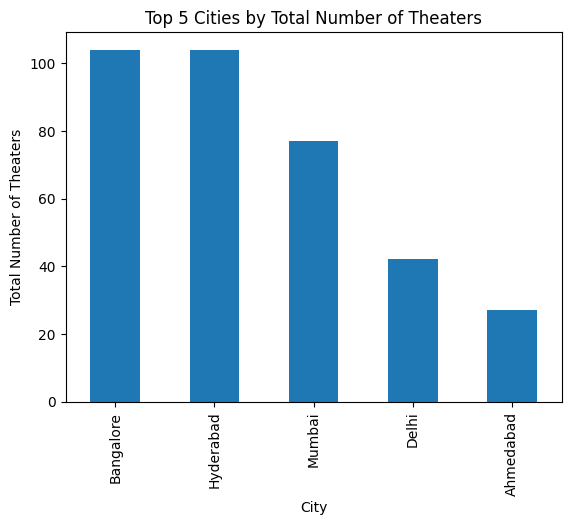

In [ ]:
# Group data by city and count the number of theaters
city_theater_counts = data['city'].value_counts()
print(city_theater_counts.nlargest(5))

# Plot a bar chart of top 5 cities by total number of theaters
city_theater_counts.nlargest(5).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Number of Theaters')
plt.title('Top 5 Cities by Total Number of Theaters')
plt.show()

In [ ]:
# Extract day of the week from date column (assuming 'date' column exists)
data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()

# Group data by day of the week and calculate average ticket price
avg_ticket_price_by_day = data.groupby('day_of_week')['average_ticket_price'].mean()
print(avg_ticket_price_by_day)

# Plot a bar chart of average ticket prices by day of the week
avg_ticket_price_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Prices by Day of the Week')
plt.show()

city
Bangalore    104
Hyderabad    104
Mumbai        77
Delhi         42
Ahmedabad     27
Name: count, dtype: int64


<ipython-input-16-4bf5d4b42f8f>:30: UserWarning: color argument of Icon should be one of: {'darkpurple', 'blue', 'orange', 'gray', 'red', 'lightgreen', 'darkblue', 'lightred', 'white', 'darkgreen', 'green', 'cadetblue', 'lightblue', 'darkred', 'purple', 'black', 'lightgray', 'pink', 'beige'}.
  folium.Marker([lat, lon], popup=f'{city} - {count} theaters', icon=folium.Icon(color='yellow')).add_to(m)
<ipython-input-16-4bf5d4b42f8f>:30: UserWarning: color argument of Icon should be one of: {'darkpurple', 'blue', 'orange', 'gray', 'red', 'lightgreen', 'darkblue', 'lightred', 'white', 'darkgreen', 'green', 'cadetblue', 'lightblue', 'darkred', 'purple', 'black', 'lightgray', 'pink', 'beige'}.
  folium.Marker([lat, lon], popup=f'{city} - {count} theaters', icon=folium.Icon(color='yellow')).add_to(m)
<ipython-input-16-4bf5d4b42f8f>:30: UserWarning: color argument of Icon should be one of: {'darkpurple', 'blue', 'orange', 'gray', 'red', 'lightgreen', 'darkblue', 'lightred', 'white', 'darkgreen'

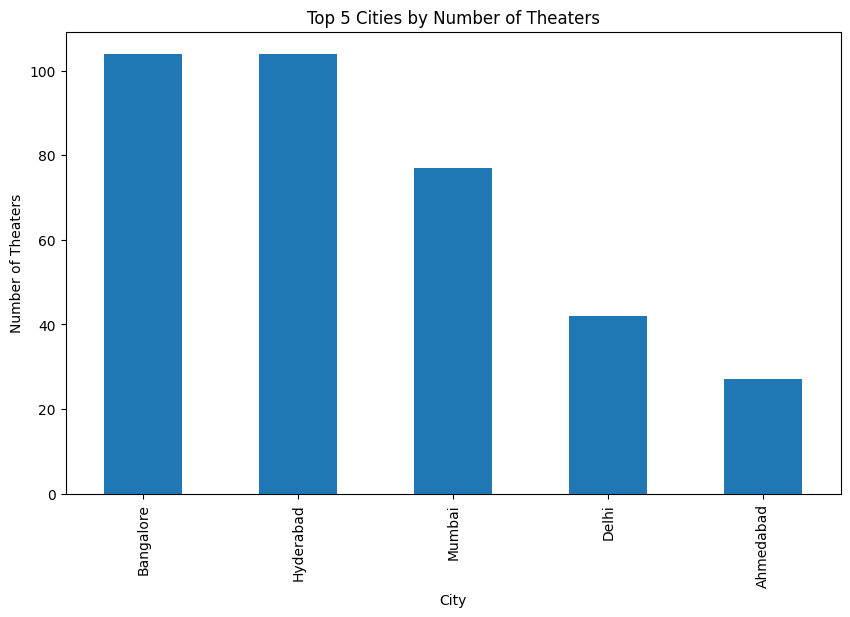

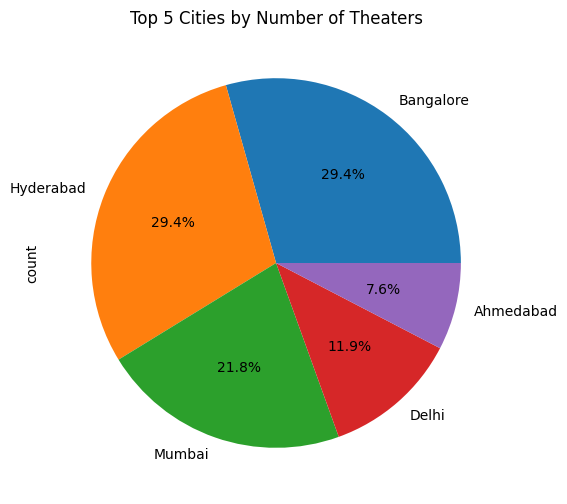

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from IPython.display import display

# Group data by city and count the number of theaters
city_theater_counts = data['city'].value_counts()
print(city_theater_counts.nlargest(5))

# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=4)

# Add markers for top 5 cities
for city, count in city_theater_counts.nlargest(5).items():
    city_data = data[data['city'] == city]
    lat = city_data['lat'].mean()
    lon = city_data['lon'].mean()
    rank = city_theater_counts.nlargest(5).tolist().index(count) + 1
    if rank == 1:
        folium.Marker([lat, lon], popup=f'{city} - Rank {rank} - {count} theaters', icon=folium.Icon(color='red')).add_to(m)
    else:
        folium.Marker([lat, lon], popup=f'{city} - Rank {rank} - {count} theaters', icon=folium.Icon(color='green')).add_to(m)

# Add markers for other cities
for city, count in city_theater_counts.items():
    if count <= city_theater_counts.nlargest(5).min():
        city_data = data[data['city'] == city]
        lat = city_data['lat'].mean()
        lon = city_data['lon'].mean()
        folium.Marker([lat, lon], popup=f'{city} - {count} theaters', icon=folium.Icon(color='yellow')).add_to(m)

# Display the map
display(m)
# Save the map as an HTML file
m.save('city_theaters_map.html')

# Plot a bar chart of top 5 cities by number of theaters
plt.figure(figsize=(10, 6))
city_theater_counts.nlargest(5).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Theaters')
plt.title('Top 5 Cities by Number of Theaters')
plt.show()

# Plot a pie chart of top 5 cities by number of theaters
plt.figure(figsize=(10, 6))
city_theater_counts.nlargest(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Cities by Number of Theaters')
plt.show()

In [ ]:
import pandas as pd
import folium
from IPython.display import display

# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=4)

# Add markers for all theaters
for index, row in data.iterrows():
    city_data = data[data['city'] == row['city']]
    avg_ticket_price = city_data['average_ticket_price'].mean()
    total_screens = city_data['no_screens'].sum()
    total_seats = city_data['total_seats'].sum()
    theatre_chains = city_data['theatre_chain'].nunique()

    folium.Marker([row['lat'], row['lon']],
                   popup=f"City: {row['city']}\nTheatre Chain: {row['theatre_chain']}\nAverage Ticket Price in City: {avg_ticket_price:.2f}\nTotal No. of Screens in City: {total_screens}\nTotal No. of Seats in City: {total_seats}\nNo. of Theatres of Different Chains in City: {theatre_chains}",
                   icon=folium.Icon(color='blue')).add_to(m)

# Display the map
display(m)

# Save the map as an HTML file
m.save('all_theatres_map.html')

In [ ]:
import pandas as pd
import folium
from IPython.display import display

# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=4)

# Add markers for all theaters
for index, row in data.iterrows():
    city_data = data[data['city'] == row['city']]
    avg_ticket_price = city_data['average_ticket_price'].mean()
    total_screens = city_data['no_screens'].sum()
    total_seats = city_data['total_seats'].sum()
    num_theatres = city_data.shape[0]
    num_chains = city_data['theatre_chain'].nunique()

    folium.Marker([row['lat'], row['lon']],
                   popup=f"City: {row['city']}\nAverage Ticket Price in City: {avg_ticket_price:.2f}\nTotal No. of Screens in City: {total_screens}\nTotal No. of Seats in City: {total_seats}\nNo. of Theatres in City: {num_theatres}\nNo. of Different Chains in City: {num_chains}",
                   icon=folium.Icon(color='blue')).add_to(m)

# Display the map
display(m)

# Save the map as an HTML file
m.save('all_theatres_map.html')

In [ ]:
import pandas as pd
import folium
from IPython.display import display

# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=4)

# Add markers for all theaters
for index, row in data.iterrows():
    city_data = data[data['city'] == row['city']]
    avg_ticket_price = city_data['average_ticket_price'].mean()
    total_screens = city_data['no_screens'].sum()
    total_seats = city_data['total_seats'].sum()
    num_theatres = city_data.shape[0]
    num_chains = city_data['theatre_chain'].nunique()

    # Get the number of theatres for each chain in the city
    chain_theatres = city_data['theatre_chain'].value_counts().to_dict()
    chain_theatres_str = "\n".join([f"{chain}: {count}" for chain, count in chain_theatres.items()])

    folium.Marker([row['lat'], row['lon']],
                   popup=f"City: {row['city']}\nAverage Ticket Price in City: {avg_ticket_price:.2f}\nTotal No. of Screens in City: {total_screens}\nTotal No. of Seats in City: {total_seats}\nNo. of Theatres in City: {num_theatres}\nNo. of Different Chains in City: {num_chains}\n\nTheatres by Chain:\n{chain_theatres_str}",
                   icon=folium.Icon(color='blue')).add_to(m)

# Display the map
display(m)

# Save the map as an HTML file
m.save('all_theatres_map.html')

In [ ]:
import pandas as pd

# Split the source_of_information column into separate sources
sources = data['source_of_information'].str.split(', ', expand=True).stack().str.strip()

# Count each type of source
source_counts = sources.value_counts()

# Print the source counts
print(source_counts)

BookMyShow           402
MediaAnt             163
Internet Research     52
mediaAnt               1
Name: count, dtype: int64


bookmyshow           402
mediaant             164
internet research     52
Name: count, dtype: int64


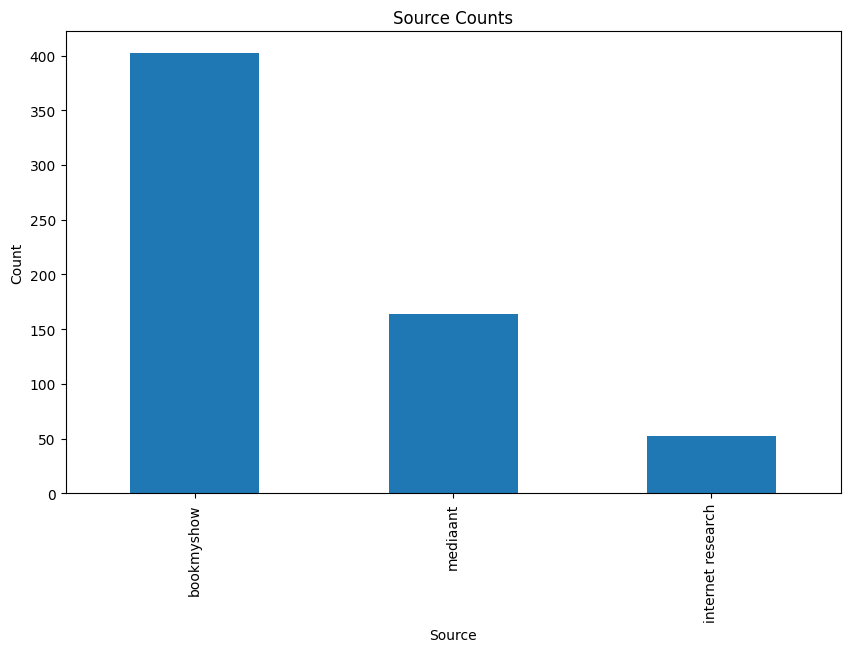

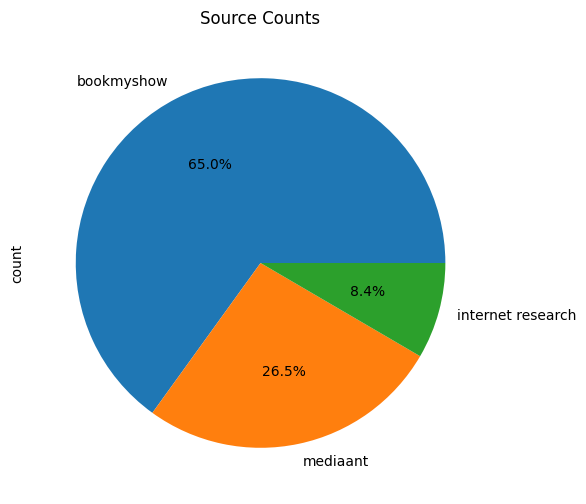

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the source_of_information column into separate sources
sources = data['source_of_information'].str.split(', ', expand=True).stack().str.strip()

# Convert sources to lowercase for consistency
sources = sources.str.lower()

# Count each type of source
source_counts = sources.value_counts()

# Print the source counts
print(source_counts)

# Plot a bar chart of source counts
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Source Counts')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

# Plot a pie chart of source counts
plt.figure(figsize=(10, 6))
source_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Source Counts')
plt.show()

city                        
Ahmedabad  bookmyshow            27
           mediaant               7
           internet research      3
Bangalore  bookmyshow           104
           mediaant              63
           internet research     10
Chennai    bookmyshow            18
           internet research      4
           mediaant               4
Delhi      bookmyshow            42
           mediaant              11
           internet research      5
Hyderabad  bookmyshow           104
           mediaant              52
           internet research     18
Kochi      bookmyshow             7
           mediaant               2
           internet research      2
Kolkata    bookmyshow            23
           internet research      8
           mediaant               7
Mumbai     bookmyshow            77
           mediaant              18
           internet research      2
Name: source_of_information, dtype: int64


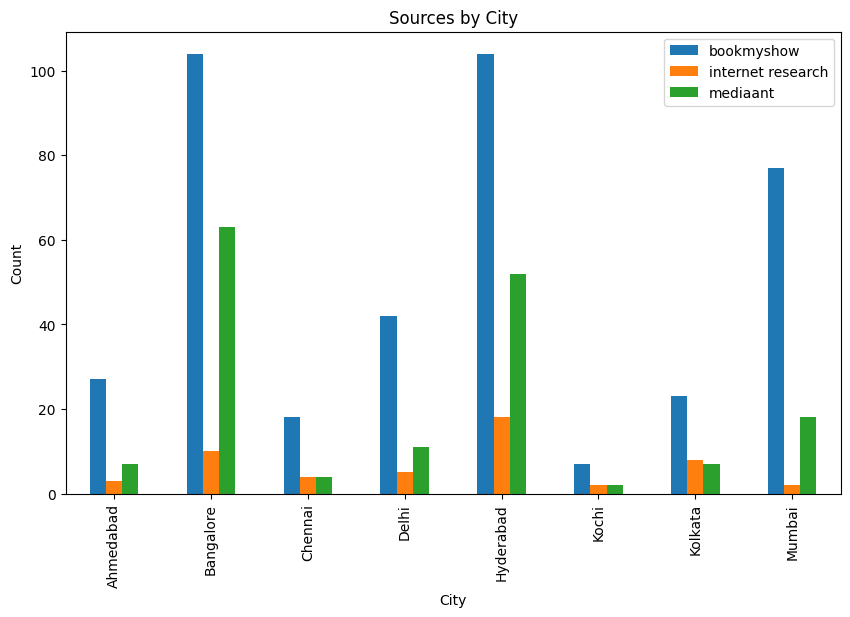

In [ ]:
city_sources = data.groupby('city')['source_of_information'].apply(lambda x: x.str.split(', ', expand=True).stack().str.strip().str.lower().value_counts())
print(city_sources)

city_sources.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Sources by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

city
Bangalore    104
Hyderabad    104
Mumbai        77
Delhi         42
Ahmedabad     27
Kolkata       23
Chennai       18
Kochi          7
Name: theatre_name, dtype: int64


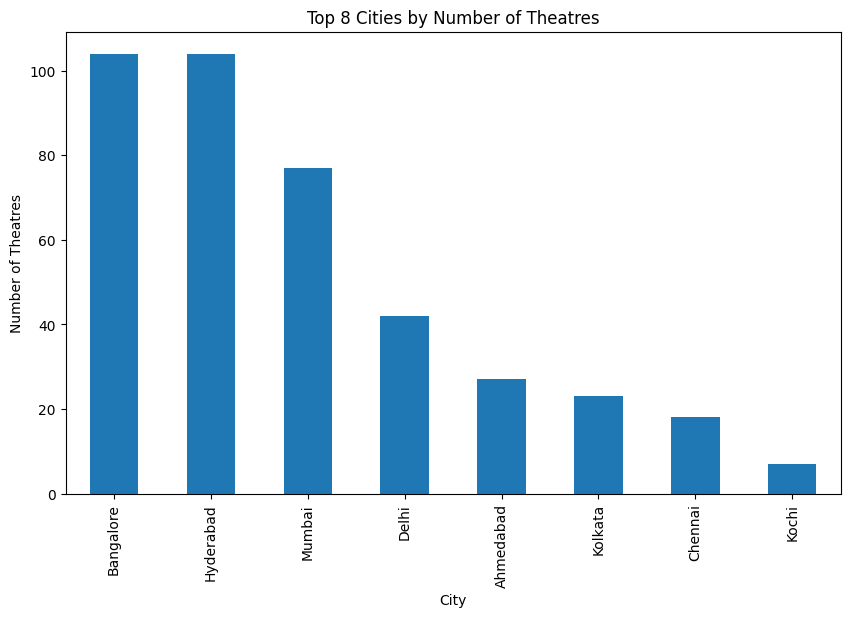

In [ ]:
top_8_cities = data.groupby('city')['theatre_name'].count().nlargest(8)
print(top_8_cities)

plt.figure(figsize=(10, 6))
top_8_cities.plot(kind='bar')
plt.title('Top 8 Cities by Number of Theatres')
plt.xlabel('City')
plt.ylabel('Number of Theatres')
plt.show()

city
Ahmedabad    149.094915
Bangalore    183.508913
Chennai       97.972407
Delhi        301.820710
Hyderabad     95.061454
Kochi        119.555098
Kolkata      187.804837
Mumbai       198.144273
Name: average_ticket_price, dtype: float64


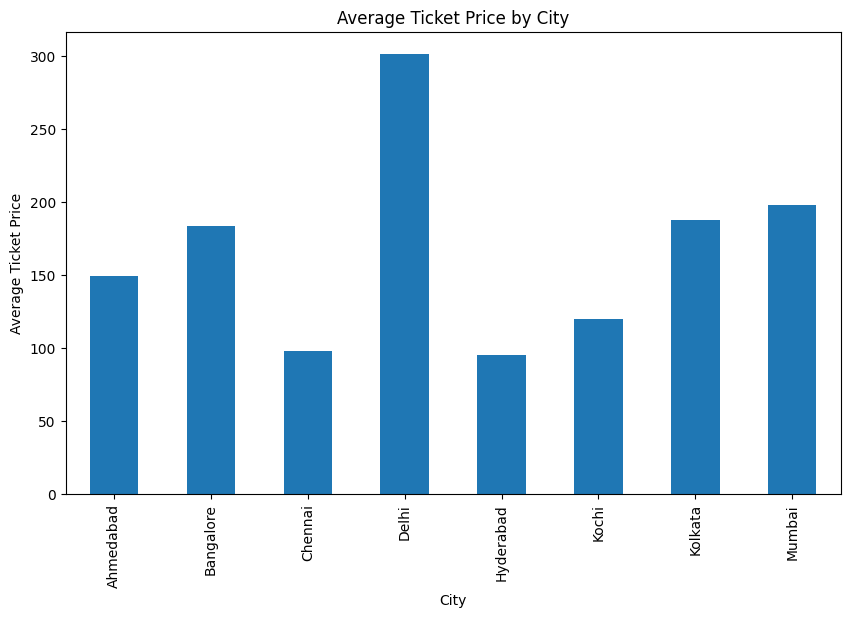

In [ ]:
avg_ticket_price = data.groupby('city')['average_ticket_price'].mean()
print(avg_ticket_price)

plt.figure(figsize=(10, 6))
avg_ticket_price.plot(kind='bar')
plt.title('Average Ticket Price by City')
plt.xlabel('City')
plt.ylabel('Average Ticket Price')
plt.show()

                                     theatre_name       city  \
84                        PVR: Orion, Rajajinagar  Bangalore   
78                          PVR: Forum, Bengaluru  Bangalore   
392                     PVR: Phoenix, Lower Parel     Mumbai   
356                       INOX: R-City, Ghatkopar     Mumbai   
236  PVR Forum Sujana Mall: Kukatpally, Hyderabad  Hyderabad   
64              INOX: Mantri Square, Malleshwaram  Bangalore   
172                    PVR Promenade: Vasant Kunj      Delhi   
81                    PVR: Market City, Bengaluru  Bangalore   
177                           PVR: Pacific, Delhi      Delhi   
390                PVR: Oberoi Mall, Goregaon (E)     Mumbai   

     revenue_potential  
84        2.478159e+07  
78        1.824896e+07  
392       1.665042e+07  
356       1.567948e+07  
236       1.540800e+07  
64        1.433747e+07  
172       1.376853e+07  
81        1.219206e+07  
177       1.195481e+07  
390       1.132985e+07  


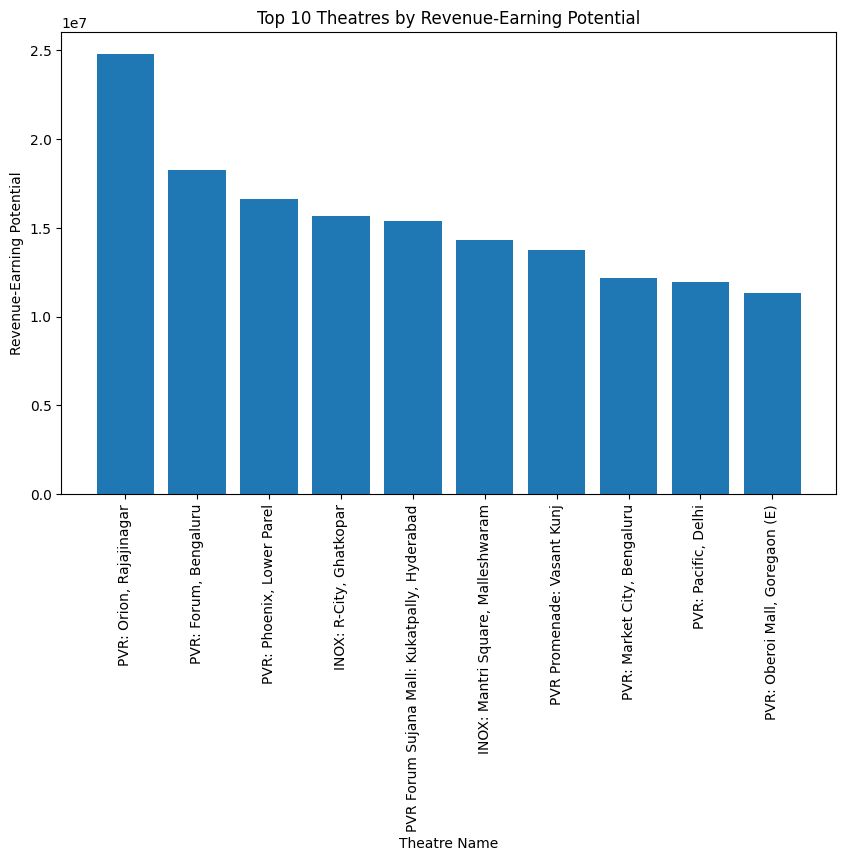

In [33]:
# Calculate revenue-earning potential
data['revenue_potential'] = data['total_seats'] * data['average_ticket_price'] * data['no_screens'] * 4

# Get top 10 theatres by revenue-earning potential
top_10_theatres = data.nlargest(10, 'revenue_potential')

# Print top 10 theatres
print(top_10_theatres[['theatre_name', 'city', 'revenue_potential']])

# Plot top 10 theatres
plt.figure(figsize=(10, 6))
plt.bar(top_10_theatres['theatre_name'], top_10_theatres['revenue_potential'])
plt.title('Top 10 Theatres by Revenue-Earning Potential')
plt.xlabel('Theatre Name')
plt.ylabel('Revenue-Earning Potential')
plt.xticks(rotation=90)
plt.show()

In [34]:
import folium

# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=4)

# Get top 10 theatres by revenue-earning potential
top_10_theatres = data.nlargest(10, 'revenue_potential')

# Add markers for top 10 theatres
for index, row in top_10_theatres.iterrows():
    folium.Marker([row['lat'], row['lon']],
                   popup=f"Theatre Name: {row['theatre_name']}\nRevenue Potential: {row['revenue_potential']:.2f}\nType: {row['type']}\nTheatre Chain: {row['theatre_chain']}\nTotal Seats: {row['total_seats']}\nAverage Ticket Price: {row['average_ticket_price']:.2f}\nNumber of Screens: {row['no_screens']}",
                   icon=folium.Icon(color='red')).add_to(m)

# Save the map as an HTML file
m.save('top_10_theatres_map.html')

In [12]:
# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=5)

# Get top 10 theatres by revenue-earning potential
top_10_theatres = data.nlargest(10, 'revenue_potential')

# Create a feature group for each city
city_groups = {}
city_theatre_details = {}

for index, row in top_10_theatres.iterrows():
    city = row['city']
    if city not in city_groups:
        city_groups[city] = folium.FeatureGroup(name=city)
        city_theatre_details[city] = []

    city_theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

# Add city markers with aggregated theatre details
for city, details in city_theatre_details.items():
    city_html = "<h2>Top Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(city_html, max_width=450),
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('top_10_theatres_map.html')

In [13]:
display(m)

In [14]:
# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=5)

# Get top 5 theatres by revenue-earning potential in each city
top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)

# Create a feature group for each city
city_groups = {}
city_theatre_details = {}

for index, row in top_5_theatres.iterrows():
    city = row['city']
    if city not in city_groups:
        city_groups[city] = folium.FeatureGroup(name=city)
        city_theatre_details[city] = []

    city_theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

# Add city markers with aggregated theatre details
for city, details in city_theatre_details.items():
    city_html = "<h2>Top 5 Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(city_html, max_width=450),
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('top_5_theatres_map.html')


<ipython-input-14-c4405a09aa8c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)


In [15]:
display(m)

In [18]:
# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=5)

# Get top 5 theatres by revenue-earning potential in each city
top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)
# Get worst 5 theatres by revenue-earning potential in each city
worst_5_theatres = data.groupby('city').apply(lambda x: x.nsmallest(5, 'revenue_potential')).reset_index(drop=True)

# Create a feature group for each city
city_groups = {}
city_theatre_details = {}

for index, row in top_5_theatres.iterrows():
    city = row['city']
    if city not in city_groups:
        city_groups[city] = folium.FeatureGroup(name=city)
        city_theatre_details[city] = []

    city_theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

# Add city markers with aggregated theatre details
for city, details in city_theatre_details.items():
    city_html = "<h2>Top 5 Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(city_html, max_width=450),
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add worst 5 theatres markers with aggregated theatre details
city_worst_theatre_details = {}
for index, row in worst_5_theatres.iterrows():
    city = row['city']
    if city not in city_worst_theatre_details:
        city_worst_theatre_details[city] = []

    city_worst_theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

for city, details in city_worst_theatre_details.items():
    city_html = "<h2>Worst 5 Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(city_html, max_width=450),
        icon=folium.Icon(color='red')
    ).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('top_and_worst_5_theatres_map.html')

<ipython-input-18-0f89a29c7928>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)
<ipython-input-18-0f89a29c7928>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_5_theatres = data.groupby('city').apply(lambda x: x.nsmallest(5, 'revenue_potential')).reset_index(drop=True)


In [19]:
display(m)

In [20]:
# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=5)

# Get worst 5 theatres by revenue-earning potential in each city
worst_5_theatres = data.groupby('city').apply(lambda x: x.nsmallest(5, 'revenue_potential')).reset_index(drop=True)

# Create a feature group for each city
city_worst_theatre_details = {}
for index, row in worst_5_theatres.iterrows():
    city = row['city']
    if city not in city_worst_theatre_details:
        city_worst_theatre_details[city] = []

    city_worst_theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

for city, details in city_worst_theatre_details.items():
    city_html = "<h2>Worst 5 Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(city_html, max_width=450),
        icon=folium.Icon(color='red')
    ).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('worst_5_theatres_map.html')

<ipython-input-20-6dd39ffa3dbb>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_5_theatres = data.groupby('city').apply(lambda x: x.nsmallest(5, 'revenue_potential')).reset_index(drop=True)


In [21]:
display(m)

In [26]:
# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=5)

# Get top 5 and worst 5 theatres by revenue-earning potential in each city
top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)
worst_5_theatres = data.groupby('city').apply(lambda x: x.nsmallest(5, 'revenue_potential')).reset_index(drop=True)

# Combine both lists
theatres = pd.concat([top_5_theatres, worst_5_theatres])

# Create a feature group for each city
city_theatre_details = {}
for index, row in theatres.iterrows():
    city = row['city']
    if city not in city_theatre_details:
        city_theatre_details[city] = []

    city_theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

for city, details in city_theatre_details.items():
    city_html = "<h2>Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(city_html, max_width=450),
        icon=folium.Icon(color='purple')
    ).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('top_and_worst_5_theatres_map.html')

<ipython-input-26-89e4b9761a63>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)
<ipython-input-26-89e4b9761a63>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_5_theatres = data.groupby('city').apply(lambda x: x.nsmallest(5, 'revenue_potential')).reset_index(drop=True)


In [27]:
display(m)

In [35]:
# Exclude 'Unknown' theatre chains
data = data[data['theatre_chain'] != 'Unknown']

# Create a map
m = folium.Map(location=[20.593683, 78.962883], zoom_start=5)

# Get top 5 theatres by revenue-earning potential in each city
top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)

# Calculate total revenue potential per theatre chain in each city
revenue_by_chain = data.groupby(['city', 'theatre_chain'])['revenue_potential'].sum().reset_index()

# Create a feature group for each city
theatre_details = {}
for index, row in top_5_theatres.iterrows():
    city = row['city']
    if city not in theatre_details:
        theatre_details[city] = []

    theatre_details[city].append(f"""
    <h3>Theatre Name: {row['theatre_name']}</h3>
    <p>Revenue Potential: {row['revenue_potential']:.2f}</p>
    <p>Type: {row['type']}</p>
    <p>Theatre Chain: {row['theatre_chain']}</p>
    <p>Total Seats: {row['total_seats']}</p>
    <p>Average Ticket Price: {row['average_ticket_price']:.2f}</p>
    <p>Number of Screens: {row['no_screens']}</p>
    """)

# Add city markers with aggregated theatre details
for city, details in theatre_details.items():
    city_html = "<h2>Top 5 Theatres in {}</h2>".format(city) + "<br><br>".join(details)
    revenue_details = revenue_by_chain[revenue_by_chain['city'] == city]
    revenue_html = "<h2>Theatre Chain Revenue Potential</h2>" + "<br>".join([f"<p>{row['theatre_chain']}: {row['revenue_potential']:.2f}</p>" for _, row in revenue_details.iterrows()])
    full_html = city_html + "<br><br>" + revenue_html

    folium.Marker(
        [data[data['city'] == city]['lat'].iloc[0], data[data['city'] == city]['lon'].iloc[0]],
        popup=folium.Popup(full_html, max_width=450),
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('top_5_theatres_and_revenue_by_chain.html')

<ipython-input-35-20d94439c466>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_theatres = data.groupby('city').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)


In [36]:
display(m)

<ipython-input-41-99c7ee0041f2>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_theatres_by_chain = data.groupby('theatre_chain').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)


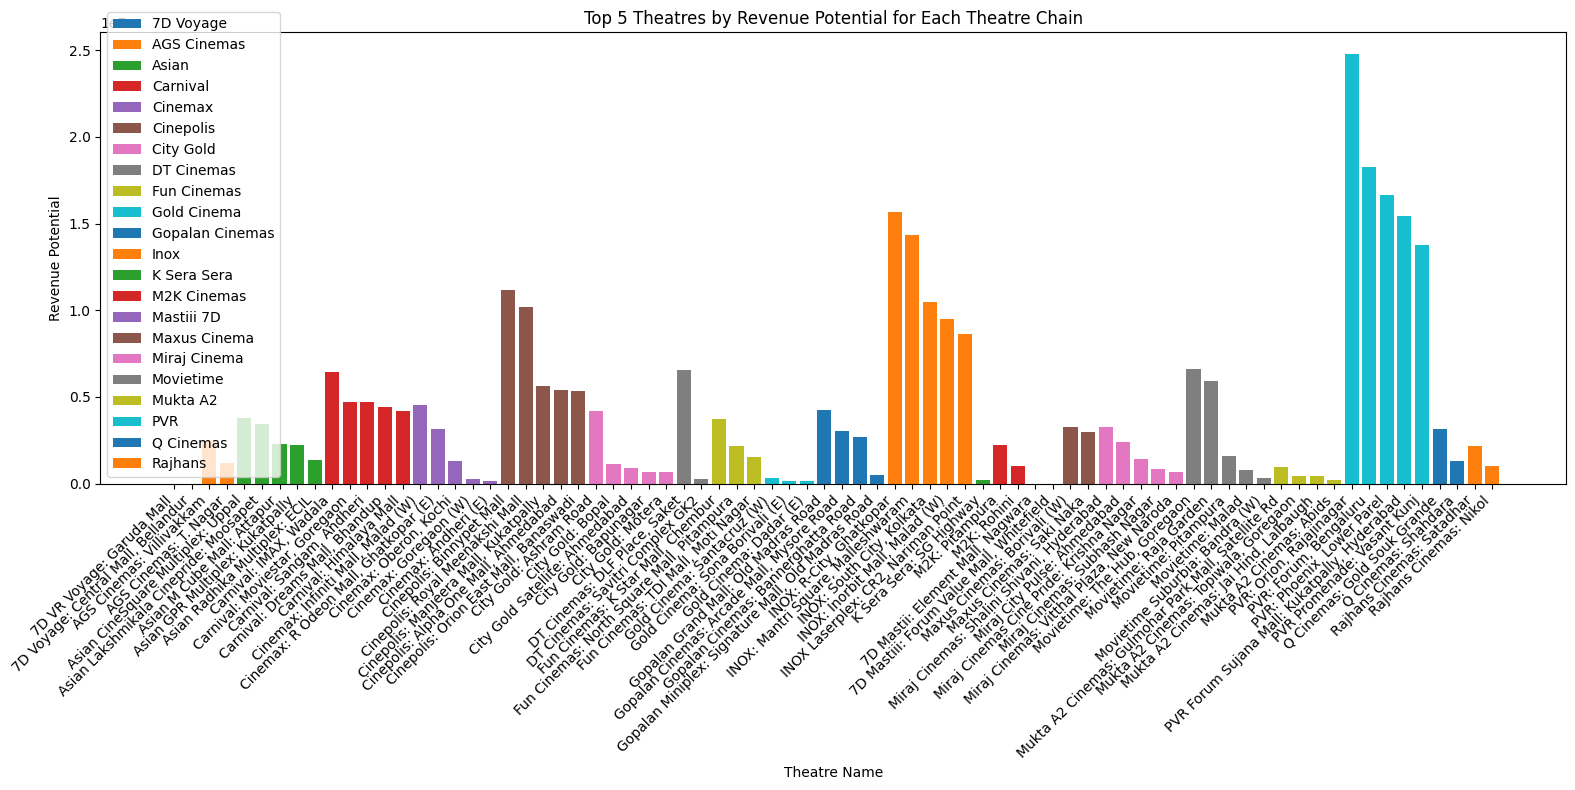

   theatre_chain                        theatre_name  revenue_potential
0      7D Voyage           7D VR Voyage: Garuda Mall       6.080000e+03
1      7D Voyage  7D Voyage: Central Mall, Bellandur       5.760000e+03
2    AGS Cinemas            AGS Cinemas: Villivakkam       2.436342e+06
3    AGS Cinemas               AGS Cinemas: T. Nagar       1.169709e+06
4          Asian   Asian CineSquare Multiplex: Uppal       3.780000e+06
..           ...                                 ...                ...
71           PVR          PVR Promenade: Vasant Kunj       1.376853e+07
72     Q Cinemas         Q Cinemas: Gold Souk Grande       3.155033e+06
73     Q Cinemas                 Q Cinemas: Shahdara       1.337225e+06
74       Rajhans           Rajhans Cinemas: Satadhar       2.146688e+06
75       Rajhans              Rajhans Cinemas: Nikol       1.018183e+06

[76 rows x 3 columns]


In [41]:
# Exclude 'Unknown' theatre chains
data = data[data['theatre_chain'] != 'Unknown']

# Get top 5 theatres by revenue-earning potential for each theatre chain
top_5_theatres_by_chain = data.groupby('theatre_chain').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)

# ... (previous code)

# Plot the data with increased figure size
plt.figure(figsize=(16, 8))  # Increase width and height

for chain in top_5_theatres_by_chain['theatre_chain'].unique():
    chain_data = top_5_theatres_by_chain[top_5_theatres_by_chain['theatre_chain'] == chain]
    plt.bar(chain_data['theatre_name'], chain_data['revenue_potential'], label=chain)

# ... (rest of the plotting code)

plt.xlabel('Theatre Name')
plt.ylabel('Revenue Potential')
plt.title('Top 5 Theatres by Revenue Potential for Each Theatre Chain')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
# Print the results
print(top_5_theatres_by_chain[['theatre_chain', 'theatre_name', 'revenue_potential']])

In [42]:
# Print all columns for the results
print(top_5_theatres_by_chain)

         city                        theatre_name  average_ticket_price  \
0   Bangalore           7D VR Voyage: Garuda Mall            190.000000   
1   Bangalore  7D Voyage: Central Mall, Bellandur            180.000000   
2     Chennai            AGS Cinemas: Villivakkam             82.700000   
3     Chennai               AGS Cinemas: T. Nagar             82.700000   
4   Hyderabad   Asian CineSquare Multiplex: Uppal            125.000000   
..        ...                                 ...                   ...   
71      Delhi          PVR Promenade: Vasant Kunj            431.723485   
72      Kochi         Q Cinemas: Gold Souk Grande            159.538462   
73      Delhi                 Q Cinemas: Shahdara            185.416667   
74  Ahmedabad           Rajhans Cinemas: Satadhar            124.229630   
75  Ahmedabad              Rajhans Cinemas: Nikol            114.505556   

    total_seats  no_screens           type theatre_chain        lat       lon  \
0             8   

<ipython-input-39-fdf638e1dbfd>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_theatres_by_chain = data.groupby('theatre_chain').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)


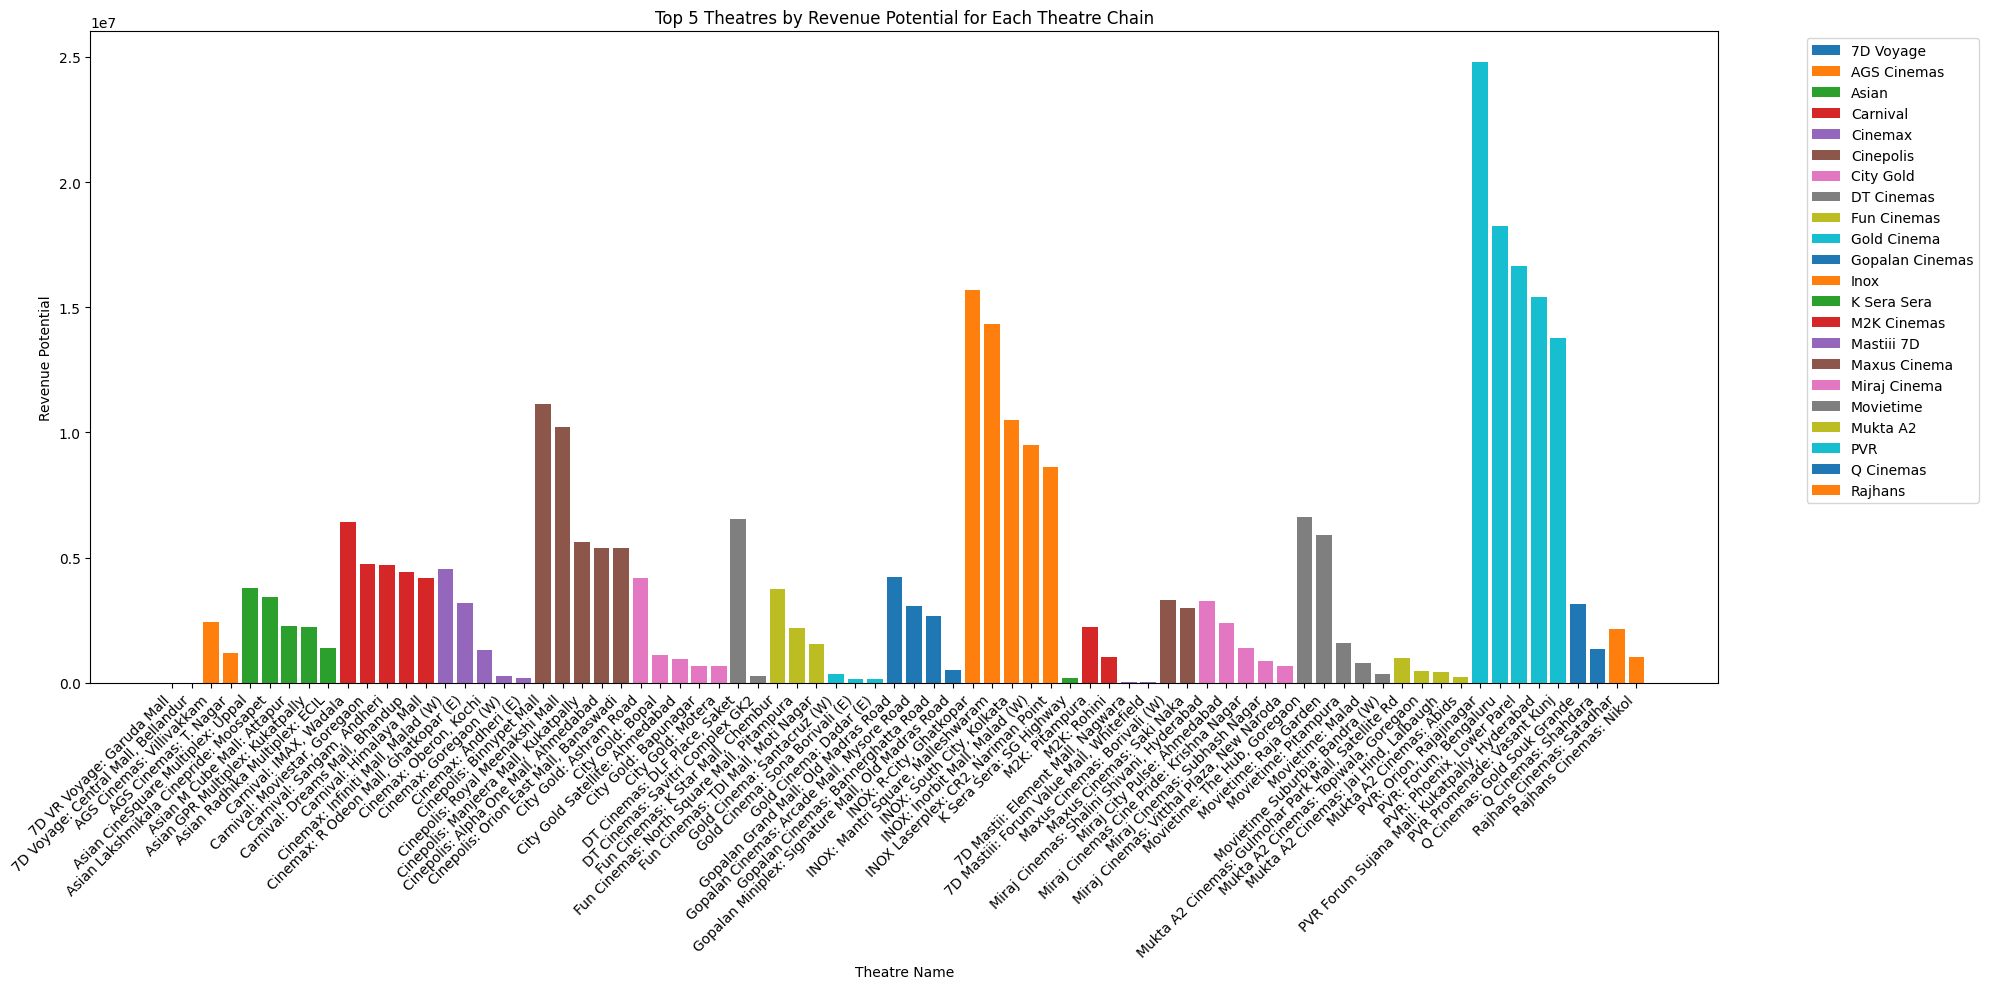

In [39]:
# Exclude 'Unknown' theatre chains
data = data[data['theatre_chain'] != 'Unknown']

# Get top 5 theatres by revenue-earning potential for each theatre chain
top_5_theatres_by_chain = data.groupby('theatre_chain').apply(lambda x: x.nlargest(5, 'revenue_potential')).reset_index(drop=True)

# ... (previous code)

# Plot the data with increased figure size and adjusted legend
plt.figure(figsize=(20, 10))  # Increase width and height further

for chain in top_5_theatres_by_chain['theatre_chain'].unique():
    chain_data = top_5_theatres_by_chain[top_5_theatres_by_chain['theatre_chain'] == chain]
    plt.bar(chain_data['theatre_name'], chain_data['revenue_potential'], label=chain)

# ... (rest of the plotting code)

plt.xlabel('Theatre Name')
plt.ylabel('Revenue Potential')
plt.title('Top 5 Theatres by Revenue Potential for Each Theatre Chain')
plt.xticks(rotation=45, ha='right')

# Adjust legend position or layout
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
# or
# plt.legend(ncol=2)  # Arrange legend items in 2 columns


plt.tight_layout()
plt.show()